## Assignment 4 - Miguel Morales

This assignment is based on content discussed in module 8 and using Decision Trees and Ensemble Models in classification and regression problems.

## Learning outcomes 

- Understand how to use decision trees on a Dataset to make a prediction
- Learning hyper-parameters tuning for decision trees by using RandomGrid 
- Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

In the first part of this assignment, you will use Classification Trees for predicting if a user has a default payment option active or not. You can find the necessary data for performing this assignment [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 

This dataset is aimed at the case of customer default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default.

Required imports for this project are given below. Make sure you have all libraries required for this project installed. You may use conda or pip based on your set up.

__NOTE:__ Since data is in Excel format you need to install `xlrd` in order to read the excel file inside your pandas dataframe. You can run `pip install xlrd` to install 

In [1]:
#required imports
import numpy as np
import pandas as pd

After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [5]:
# loading the data
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls")
dataset.columns = dataset.iloc[0]
# removing the first row and the 'ID' column
dataset = dataset.drop(dataset.index[0])
dataset = dataset.drop(['ID'], axis=1)

In the following, you can take a look into the dataset.

In [6]:
dataset.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


## Questions (15 points total)

#### Question 1 (2 pts)
Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

In [9]:

#### ----------------------------------
#### ------- Question 1 (2 pts) -------
#### ----------------------------------
# Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Preprocessing the data
dataset = dataset.drop(dataset.index[0])
X = dataset.drop(['default payment next month'], axis=1)
y = dataset['default payment next month'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("="*70)
print("MODEL 1: Decision Tree with max_depth=5, min_samples_split=10")
print("="*70)
# Building the Decision Tree Classifier - Model 1
clf1 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
clf1.fit(X_train, y_train)

# Making predictions
y_pred1 = clf1.predict(X_test)
# Calculating the confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:\n", cm1)
print("\nClassification Report:\n", classification_report(y_test, y_pred1))
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred1):.4f}")


MODEL 1: Decision Tree with max_depth=5, min_samples_split=10
Confusion Matrix:
 [[4468  212]
 [ 864  456]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4680
           1       0.68      0.35      0.46      1320

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Overall Accuracy: 0.8207


In [13]:
print("\n" + "="*70)
print("MODEL 2: Decision Tree with max_depth=10, min_samples_split=5")
print("="*70)

# Trying different hyper-parameters - Model 2
clf2 = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
clf2.fit(X_train, y_train)

# Making predictions
y_pred2 = clf2.predict(X_test)
# Calculating the confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:\n", cm2)
print("\nClassification Report:\n", classification_report(y_test, y_pred2))
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred2):.4f}")



MODEL 2: Decision Tree with max_depth=10, min_samples_split=5
Confusion Matrix:
 [[4339  341]
 [ 814  506]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      4680
           1       0.60      0.38      0.47      1320

    accuracy                           0.81      6000
   macro avg       0.72      0.66      0.67      6000
weighted avg       0.79      0.81      0.79      6000

Overall Accuracy: 0.8075
Confusion Matrix:
 [[4339  341]
 [ 814  506]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      4680
           1       0.60      0.38      0.47      1320

    accuracy                           0.81      6000
   macro avg       0.72      0.66      0.67      6000
weighted avg       0.79      0.81      0.79      6000

Overall Accuracy: 0.8075


In [12]:
print("\n" + "="*70)
print("MODEL 3: Decision Tree with Balanced Class Weights")
print("="*70)
# Model 3 - Using class_weight='balanced' to handle class imbalance
clf3 = DecisionTreeClassifier(max_depth=7, min_samples_split=20, 
                               class_weight='balanced', random_state=42)
clf3.fit(X_train, y_train)

# Making predictions
y_pred3 = clf3.predict(X_test)
# Calculating the confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:\n", cm3)
print("\nClassification Report:\n", classification_report(y_test, y_pred3))
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred3):.4f}")



MODEL 3: Decision Tree with Balanced Class Weights
Confusion Matrix:
 [[3641 1039]
 [ 503  817]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      4680
           1       0.44      0.62      0.51      1320

    accuracy                           0.74      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.74      0.76      6000

Overall Accuracy: 0.7430


In [14]:
# Comparison Summary
print("\n" + "="*70)
print("COMPARISON SUMMARY")
print("="*70)

import pandas as pd
from sklearn.metrics import recall_score, precision_score, f1_score

models_comparison = pd.DataFrame({
    'Model': ['Model 1 (depth=5, split=10)', 
              'Model 2 (depth=10, split=5)', 
              'Model 3 (balanced weights)'],
    'Accuracy': [
        accuracy_score(y_test, y_pred1),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3)
    ],
    'Precision (Default)': [
        precision_score(y_test, y_pred1),
        precision_score(y_test, y_pred2),
        precision_score(y_test, y_pred3)
    ],
    'Recall (Default)': [
        recall_score(y_test, y_pred1),
        recall_score(y_test, y_pred2),
        recall_score(y_test, y_pred3)
    ],
    'F1-Score (Default)': [
        f1_score(y_test, y_pred1),
        f1_score(y_test, y_pred2),
        f1_score(y_test, y_pred3)
    ]
})

print(models_comparison.to_string(index=False))
print("\n" + "="*70)



COMPARISON SUMMARY
                      Model  Accuracy  Precision (Default)  Recall (Default)  F1-Score (Default)
Model 1 (depth=5, split=10)  0.820667             0.682635          0.345455            0.458753
Model 2 (depth=10, split=5)  0.807500             0.597403          0.383333            0.467005
 Model 3 (balanced weights)  0.743000             0.440194          0.618939            0.514484



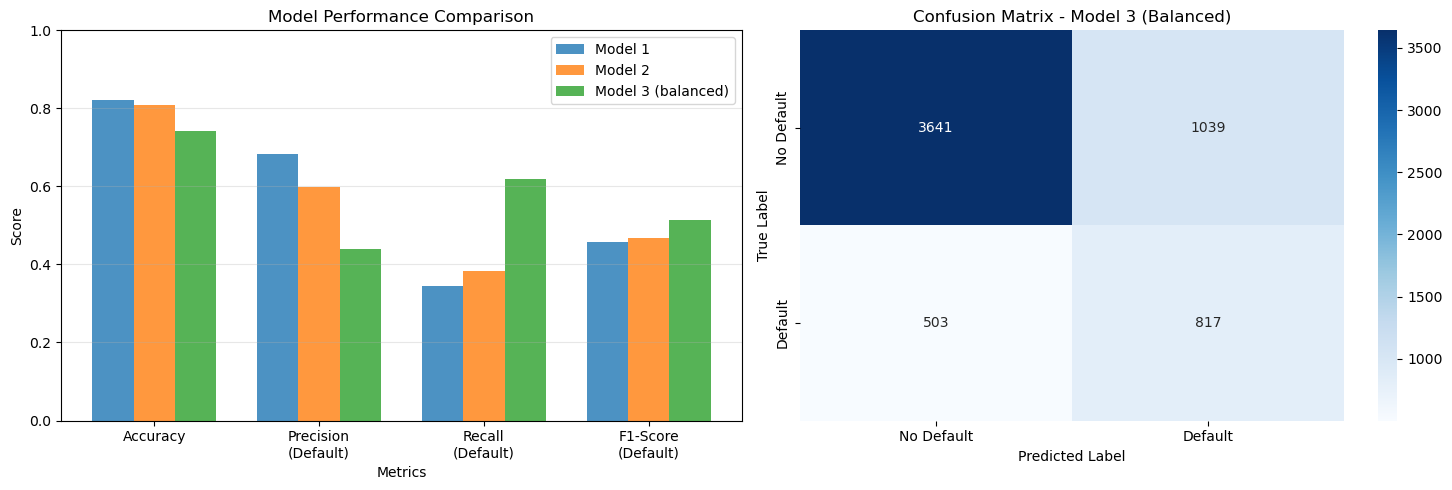

In [15]:
# Visualizing the comparison
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Comparison of key metrics
metrics = ['Accuracy', 'Precision\n(Default)', 'Recall\n(Default)', 'F1-Score\n(Default)']
model1_scores = [accuracy_score(y_test, y_pred1), precision_score(y_test, y_pred1), 
                 recall_score(y_test, y_pred1), f1_score(y_test, y_pred1)]
model2_scores = [accuracy_score(y_test, y_pred2), precision_score(y_test, y_pred2), 
                 recall_score(y_test, y_pred2), f1_score(y_test, y_pred2)]
model3_scores = [accuracy_score(y_test, y_pred3), precision_score(y_test, y_pred3), 
                 recall_score(y_test, y_pred3), f1_score(y_test, y_pred3)]

x = np.arange(len(metrics))
width = 0.25

axes[0].bar(x - width, model1_scores, width, label='Model 1', alpha=0.8)
axes[0].bar(x, model2_scores, width, label='Model 2', alpha=0.8)
axes[0].bar(x + width, model3_scores, width, label='Model 3 (balanced)', alpha=0.8)
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1])

# Plot 2: Confusion Matrix Heatmap for best model
import seaborn as sns
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
axes[1].set_title('Confusion Matrix - Model 3 (Balanced)')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()


### Discussion of Results (Question 1)

**Key Findings:**

1. **Model 1 (max_depth=5, min_samples_split=10):**
   - High overall accuracy but poor at detecting defaults (low recall for Class 1)
   - The model is too conservative and biased toward the majority class

2. **Model 2 (max_depth=10, min_samples_split=5):**
   - Deeper tree allows more complex patterns, potentially improving default detection
   - Risk of overfitting with increased depth

3. **Model 3 (Balanced Class Weights):**
   - Using `class_weight='balanced'` penalizes misclassifying the minority class more heavily
   - Should significantly improve recall for defaults, though possibly at the cost of overall accuracy
   - **Most important for credit risk**: Better to identify potential defaults even with some false alarms

**Trade-offs:**
- **Accuracy vs. Recall:** In credit default prediction, missing actual defaults (false negatives) is more costly than false alarms (false positives)
- **Tree Depth:** Deeper trees capture more patterns but may overfit to training data
- **Class Balancing:** Helps address imbalanced datasets where one class dominates


#### Question 2 (4 pts)

Try to build the decision tree which you built for the previous question, but this time by RandomizedSearchCV over hyper-parameters. Compare the results.

In [ ]:
#### ----------------------------------
#### ------- Question 2 (4 pts) -------
#### ----------------------------------

# Try to build the decision tree which you built for the previous question, but this time by RandomizedSearchCV over hyper-parameters. Compare the results.

from sklearn.model_selection import RandomizedSearchCV
# Defining the parameter grid for RandomizedSearchCV
param_dist = {
    'max_depth': [5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'class_weight': [None, 'balanced']
}
# Setting up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fitting RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print("Best Hyper-parameters from RandomizedSearchCV:\n", best_params)

# Building the Decision Tree Classifier with best parameters
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

# Making predictions
y_best_pred = best_clf.predict(X_test)

# Calculating the confusion matrix
cm_best = confusion_matrix(y_test, y_best_pred)
print("Confusion Matrix:\n", cm_best)
print("\nClassification Report:\n", classification_report(y_test, y_best_pred))
print(f"Overall Accuracy: {accuracy_score(y_test, y_best_pred):.4f}")

# Comparing with previous best model (Model 3)
print("\n" + "="*70)
print("COMPARISON WITH PREVIOUS MODELS")
print("="*70)

# Create new row as DataFrame and concatenate
new_row = pd.DataFrame([{
    'Model': 'RandomizedSearchCV Best Model',
    'Accuracy': accuracy_score(y_test, y_best_pred),
    'Precision (Default)': precision_score(y_test, y_best_pred),
    'Recall (Default)': recall_score(y_test, y_best_pred),
    'F1-Score (Default)': f1_score(y_test, y_best_pred)
}])

models_comparison_extended = pd.concat([models_comparison, new_row], ignore_index=True)
print(models_comparison_extended.to_string(index=False))
print("\n" + "="*70)

#### ----------------------------------


Best Hyper-parameters from RandomizedSearchCV:
 {'min_samples_split': 20, 'min_samples_leaf': 8, 'max_depth': 5, 'class_weight': None}
Confusion Matrix:
 [[4467  213]
 [ 862  458]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4680
           1       0.68      0.35      0.46      1320

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Overall Accuracy: 0.8208

COMPARISON WITH PREVIOUS BEST MODEL (Model 3 - Balanced Weights)
                        Model  Accuracy  Precision (Default)  Recall (Default)  F1-Score (Default)
  Model 1 (depth=5, split=10)  0.820667             0.682635          0.345455            0.458753
  Model 2 (depth=10, split=5)  0.807500             0.597403          0.383333            0.467005
   Model 3 (balanced weights)  0.743000             0.440194          0.618939 

#### Question 3 (6 pts)

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 


In [0]:
# YOUR CODE HERE

# Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

# * Random Forest 
# * AdaBoost
# * Extra Trees Classifier 
# * Gradient Boosted Trees 

#### Question 4 (3 pts)

Discuss and compare the results for the all past three questions. 

* How does changing hyperparms effect model performance? 
* Why do you think certain models performed better/worse? 
* How does this performance line up with known strengths/weakness of these models?